# Práctica 1

Revise los comandos descritos en cada una de las celdas y revise el funcionamiento del algoritmo cuando se tienen datos duplicados o erróneos en el conjunto de datos.

In [1]:
# Librerias
import pandas as pd
import numpy as np
import seaborn as sns

from sklearn.preprocessing import MinMaxScaler

#Plots
from colorama import Fore, Back, Style 
import matplotlib.pyplot as plt
#from mlxtend.plotting import plot_confusion_matrix

#Models
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

#%config IPCompleter.greedy=True
#import mglearn

In [2]:
import warnings
warnings.filterwarnings('ignore')

# Analyze Data

In [3]:
data = pd.read_csv('practica2.csv')

In [4]:
# data shape
data.shape


(17175, 10)

In [5]:
data.describe()

,gender,heartrate,breathing,cortisol,delta,theta,alpha,beta,gamma,stress
count,17175.000000,17164.000000,17164.000000,17164.000000,17164.000000,17164.000000,17164.000000,17164.000000,17164.000000,17175.0
mean,0.504687,120.578828,24.810708,53.511540,2.490886,6.510484,11.013452,24.501091,67.311082,1.0
std,0.499993,35.170863,3.662573,15.676915,1.443091,0.872050,1.741405,6.090847,18.723524,0.0
min,0.000000,74.000000,18.000000,26.009400,0.000400,5.000400,8.000100,14.000000,35.010400,1.0
25%,0.000000,90.000000,22.000000,39.827000,1.244375,5.742350,9.499600,19.179125,51.051250,1.0
50%,1.000000,112.000000,25.000000,54.227450,2.482250,6.523000,11.014200,24.499250,67.318850,1.0
75%,1.000000,150.000000,28.000000,67.134550,3.741700,7.272625,12.532250,29.811675,83.422450,1.0
max,1.000000,190.000000,30.000000,79.999300,4.999800,7.999800,14.000000,34.998300,99.993500,1.0


In [6]:
# data types
data.dtypes

gender         int64
heartrate    float64
breathing    float64
cortisol     float64
delta        float64
theta        float64
alpha        float64
beta         float64
gamma        float64
stress         int64
dtype: object

In [7]:
#total percentage of missing data
missing_data = data.isnull().sum()
total_percentage = (missing_data.sum()/data.shape[0]) * 100
print(f'El porcentaje de datos perdidos es: {round(total_percentage,2)}%')

El porcentaje de datos perdidos es: 0.51%


In [8]:
# percentage of missing data per category
total = data.isnull().sum().sort_values(ascending=False)
percent_total = (data.isnull().sum()/data.isnull().count()).sort_values(ascending=False)*100
missing = pd.concat([total, percent_total], axis=1, keys=["Total", "Percentage"])
missing_data = missing[missing['Total']>0]
missing_data

,Total,Percentage
heartrate,11,0.064047
breathing,11,0.064047
cortisol,11,0.064047
delta,11,0.064047
theta,11,0.064047
alpha,11,0.064047
beta,11,0.064047
gamma,11,0.064047


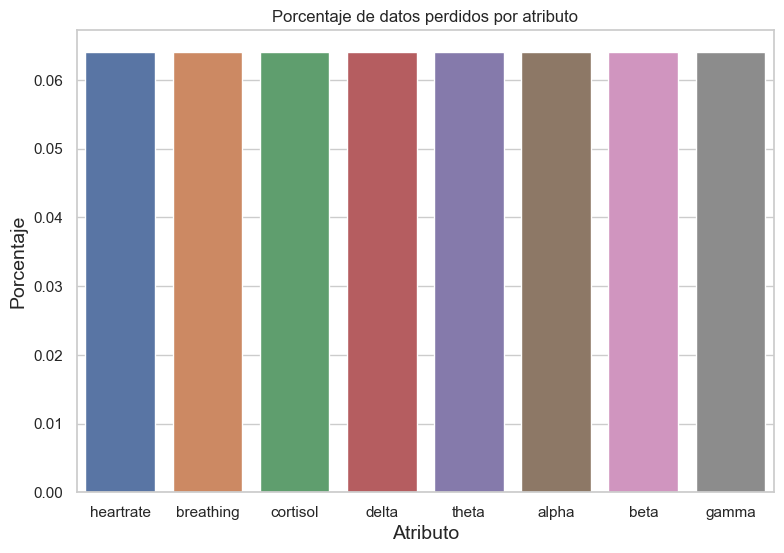

In [9]:
if len(missing_data)!=0:
    plt.figure(figsize=(9,6))
    sns.set(style="whitegrid")
    sns.barplot(x=missing_data.index, y=missing_data['Percentage'], data = missing_data)
    plt.title('Porcentaje de datos perdidos por atributo')
    plt.xlabel('Atributo', fontsize=14)
    plt.ylabel('Porcentaje', fontsize=14)
    plt.show()
else:
    print("No se tienen datos perdidos...")

# Accuracy del algoritmo sin limpieza de datos

In [10]:
#Todas las variables que se quieran evaluar, quitamos la variable de y
X = data.drop('stress',axis=1)
y = data['stress']

In [11]:
# split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=1)

In [12]:
# fit the model
model = LogisticRegression()
model.fit(X_train, y_train)
# evaluate the model
yhat = model.predict(X_test)
# evaluate predictions
accuracy = accuracy_score(y_test, yhat)
print('Accuracy: %.3f' % (accuracy*100))

ValueError: Input X contains NaN.
LogisticRegression does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values

# Limpieza de datos

In [13]:
#Eliminar los datos con valores perdiodos
data.dropna(axis=0, inplace=True)

In [14]:
data['stress'] = data['stress'].astype(int)

El siguiente comando deberá listar el total de registros una vez eliminados los valores perdidos.

In [15]:
data.shape

(17164, 10)

In [16]:
# data types
data.dtypes

gender         int64
heartrate    float64
breathing    float64
cortisol     float64
delta        float64
theta        float64
alpha        float64
beta         float64
gamma        float64
stress         int32
dtype: object

In [17]:
#total percentage of missing data
missing_data = data.isnull().sum()
total_percentage = (missing_data.sum()/data.shape[0]) * 100
print(f'El porcentaje de datos perdidos es: {round(total_percentage,2)}%')

El porcentaje de datos perdidos es: 0.0%


# Revisión del comportamiento de los datos

In [18]:
# I am using pandas profiling for exploratory data analysis
from pandas_profiling import ProfileReport
profile = ProfileReport(data, title="Pandas Profiling Report")
profile

ImportError: cannot import name 'DataError' from 'pandas.core.base' (C:\Users\Josman\AppData\Local\Programs\Python\Python311\Lib\site-packages\pandas\core\base.py)

In [ ]:
# plot histogram to see the distribution of the data
fig = plt.figure(figsize = (15,20))
ax = fig.gca()
data.hist(ax = ax)
plt.show()


In [ ]:

sns.countplot(x='stress',data=data, palette='husl')
plt.show()
cases = data.stress.value_counts()
print(f"El conjunto de datos contiene {cases[0]} pacientes con estress bajo y {cases[1]} pacients con estres alto")



In [ ]:
#Number of people who have disease vs age
plt.figure(figsize=(15,6))
sns.countplot(x='gender',data = data, hue = 'stress',palette='husl')
plt.show()


In [ ]:
plt.figure(figsize=(12,8))
sns.distplot(data['cortisol'])
plt.title('Distribución Variable Cortisol', fontsize=20)

In [ ]:
plt.figure(figsize=(12,8))
sns.distplot(data['gender'])
plt.title('Distribución Variable Gender', fontsize=20)

In [ ]:
def stacked_barchart(data, title = None, ylabel = None, xlabel = None):
    default_colors = ['#008080', '#5f3c41', '#219AD8']
    # From raw value to percentage
    totals = data.sum(axis=1)
    bars = ((data.T / totals) * 100).T
    r = list(range(data.index.size))

    # Plot
    barWidth = 0.95
    names = data.index.tolist()
    bottom = [0] * bars.shape[0]

    # Create bars
    color_index = 0
    plots = []
    for bar in bars.columns:
        plots.append(plt.bar(r, bars[bar], bottom=bottom, color=default_colors[color_index], edgecolor='white', width=barWidth))
        bottom = list(map(add, bottom, bars[bar]))
        color_index = 0 if color_index >= len(default_colors) else color_index + 1

    # Custom x axis
    plt.title(title)
    plt.xticks(r, names)
    plt.xlabel(data.index.name if xlabel is None else xlabel)
    plt.ylabel(data.columns.name if ylabel is None else ylabel)
    ax = plt.gca()
        
    y_labels = ax.get_yticks()
    ax.set_yticklabels([str(y) + '%' for y in y_labels])

    flat_list = [item for sublist in data.T.values for item in sublist]
    for i, d in zip(ax.patches, flat_list):
        data_label = str(d) + " (" + str(round(i.get_height(), 2)) + "%)"
        ax.text(i.get_x() + 0.45, i.get_y() + 5, data_label, horizontalalignment='center', verticalalignment='center', fontdict = dict(color = 'white', size = 20))

    for item in ([ax.title]):
        item.set_fontsize(27)
        
    for item in ([ax.xaxis.label, ax.yaxis.label] + ax.get_xticklabels() + ax.get_yticklabels()):
        item.set_fontsize(24)
    
    legend = ax.legend(plots, bars.columns.tolist(), fancybox=True)
    plt.setp(legend.get_texts(), fontsize='20')

In [ ]:
from operator import add
fig = plt.gcf()
fig.set_size_inches(25, 35)
grid_rows = 3
grid_cols = 2

#draw sex vs disease outcome
plt.subplot(grid_rows, grid_cols, 1)
temp = data[['gender','stress']].groupby(['gender','stress']).size().unstack('stress')
temp.rename(index={0:'Femenino', 1:'Masculino'}, columns={0:'No', 1:'Si'}, inplace = True)
stacked_barchart(temp, title = 'Stress vs Gender', ylabel = 'Población')



In [ ]:
plt.figure(figsize=(20,12))
sns.heatmap(data.corr(), annot = True)
plt.show()

# Calculando el rendimiento del algoritmo

In [ ]:
#Todas las variables que se quieran evaluar, quitamos la variable de y
X = data.drop('stress',axis=1)
y = data['stress']

In [ ]:
# split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=1)

In [ ]:
# fit the model
model = LogisticRegression()
model.fit(X_train, y_train)
# evaluate the model
yhat = model.predict(X_test)
# evaluate predictions
accuracy = accuracy_score(y_test, yhat)
print('Accuracy: %.3f' % (accuracy*100))

# Mejorando el rendimiento del algoritmo

In [ ]:
# define the scaler
scaler = MinMaxScaler()
# fit on the training dataset
scaler.fit(X_train)
# scale the training dataset
X_train = scaler.transform(X_train)
# scale the test dataset
X_test = scaler.transform(X_test)

In [ ]:
# fit the model
model = LogisticRegression()
model.fit(X_train, y_train)
# evaluate the model
yhat = model.predict(X_test)
# evaluate predictions
accuracy = accuracy_score(y_test, yhat)
print('Accuracy: %.3f' % (accuracy*100))

# ¿Cuál es el procedimiento para eliminar las filas duplicadas?